In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Load latency data

In [4]:
cicero_latency_dir = "/home/obola/repositories/cicero-scm-surrogate/data/20250926_110035/latencies/cicero_latencies.npz"
surrogate_cpu_latency_dir = "/home/obola/repositories/cicero-scm-surrogate/data/20250926_110035/latencies/surrogate_latencies_cpu_lstm_v1.npz"
surrogate_gpu_latency_dir = "/home/obola/repositories/cicero-scm-surrogate/data/20250926_110035/latencies/surrogate_latencies_cuda_lstm_v1.npz"

cicero_latency = np.load(cicero_latency_dir)['arr_0']
surrogate_cpu_latency = np.load(surrogate_cpu_latency_dir)['arr_0']
surrogate_gpu_latency = np.load(surrogate_gpu_latency_dir)['arr_0']

### 1.1 Statistics

In [5]:
cicero_mean = np.mean(cicero_latency)
cicero_std = np.std(cicero_latency)
cicero_sum = np.sum(cicero_latency)

print(f"CICERO MEAN:{cicero_mean}")
print(f"CICERO STD:{cicero_std}")
print(f"CICERO SUM:{cicero_sum}")

# Surrogate CPU
surrogate_cpu_mean = np.mean(surrogate_cpu_latency)
surrogate_cpu_std  = np.std(surrogate_cpu_latency)
surrogate_cpu_sum  = np.sum(surrogate_cpu_latency)

print(f"SURROGATE CPU MEAN: {surrogate_cpu_mean:.6f}")
print(f"SURROGATE CPU STD:  {surrogate_cpu_std:.6f}")
print(f"SURROGATE CPU SUM:  {surrogate_cpu_sum:.6f}")

# Surrogate GPU
surrogate_gpu_mean = np.mean(surrogate_gpu_latency)
surrogate_gpu_std  = np.std(surrogate_gpu_latency)
surrogate_gpu_sum  = np.sum(surrogate_gpu_latency)

print(f"SURROGATE GPU MEAN: {surrogate_gpu_mean:.6f}")
print(f"SURROGATE GPU STD:  {surrogate_gpu_std:.6f}")
print(f"SURROGATE GPU SUM:  {surrogate_gpu_sum:.6f}")


CICERO MEAN:0.3923045937490463
CICERO STD:0.08708949370001513
CICERO SUM:39230.45937490463
SURROGATE CPU MEAN: 0.002755
SURROGATE CPU STD:  0.000115
SURROGATE CPU SUM:  275.492334
SURROGATE GPU MEAN: 0.001432
SURROGATE GPU STD:  0.000015
SURROGATE GPU SUM:  143.236361


## 2. Visualize latency data

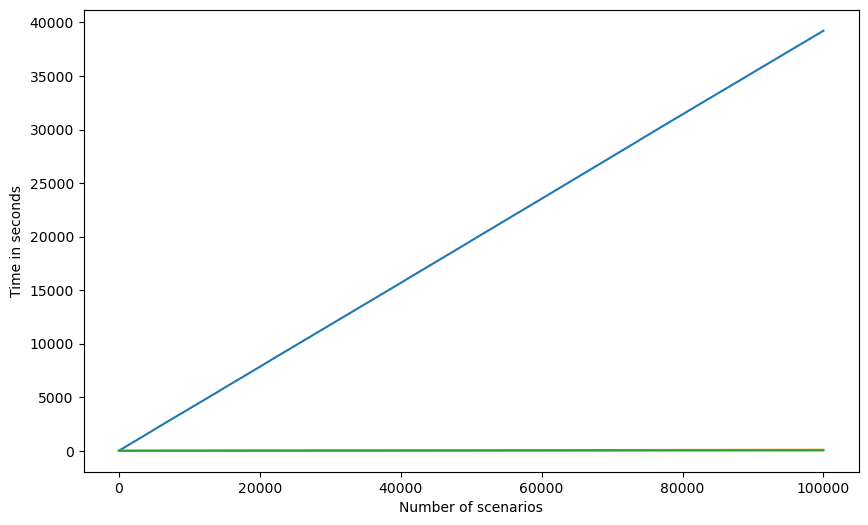

In [15]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(cicero_latency))
plt.plot(np.cumsum(surrogate_cpu_latency))
plt.plot(np.cumsum(surrogate_gpu_latency))
plt.ylabel("Time in seconds")
plt.xlabel("Number of scenarios")
plt.savefig("cumsum_speed.pdf", dpi = 300, bbox_inches="tight")
plt.show()

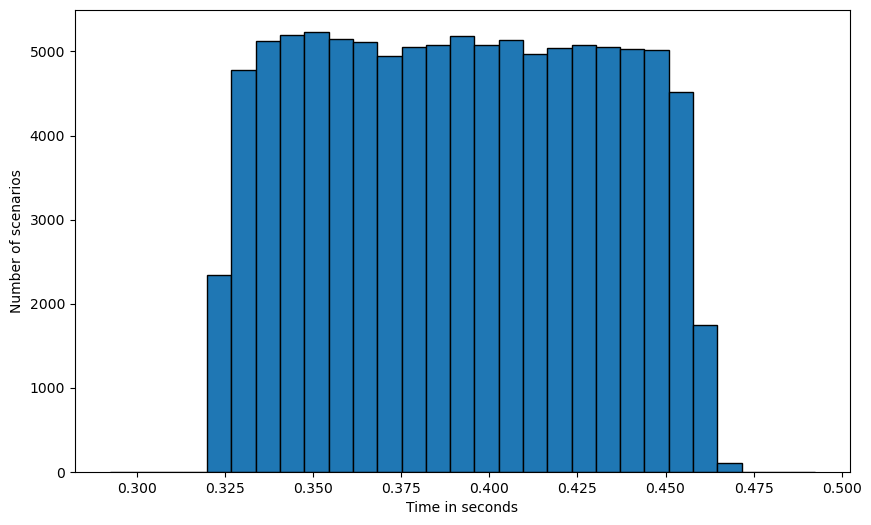

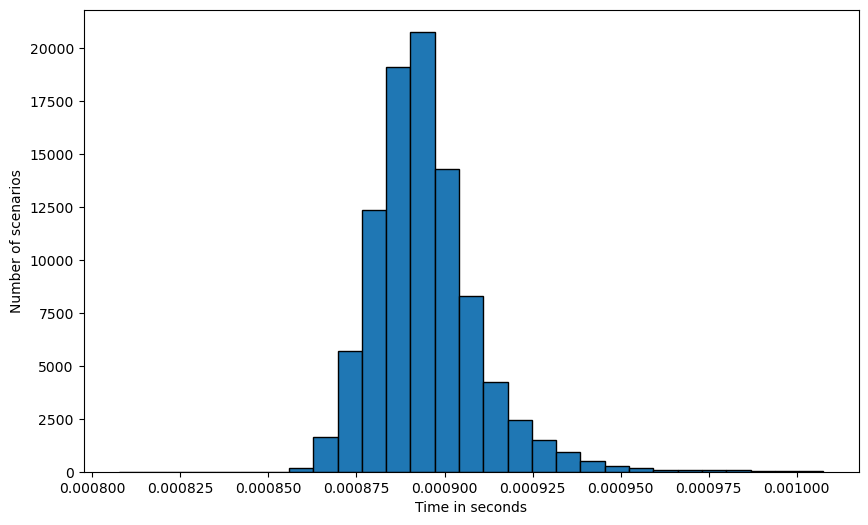

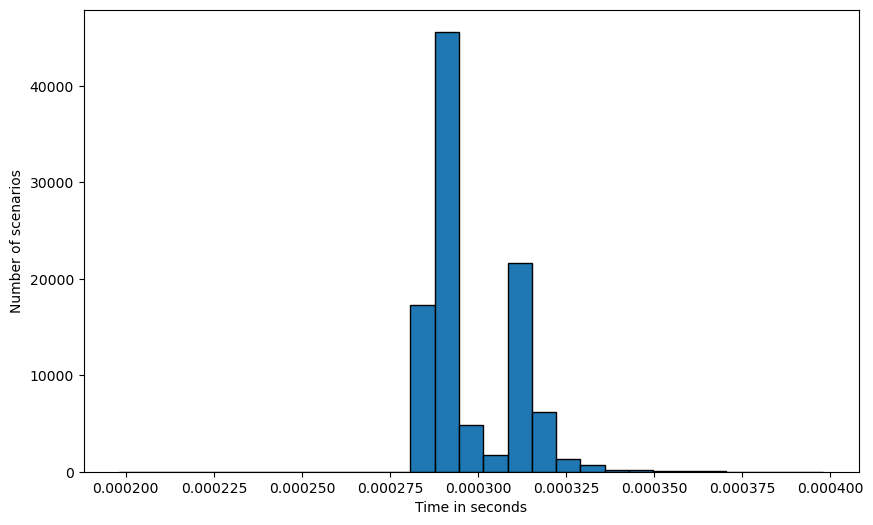

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist(data, fig_name):
    mean_val = np.mean(data)

    # order of magnitude around the mean
    delta = 10 ** int(np.floor(np.log10(mean_val)))

    # bin edges from mean - delta to mean + delta
    bins = np.linspace(mean_val - delta, mean_val + delta, 30)  # 30 bins for smoothness

    plt.figure(figsize=(10,6))
    plt.hist(data, bins=bins, edgecolor="black")
    plt.xlabel("Time in seconds")
    plt.ylabel("Number of scenarios")
    plt.savefig(fig_name, dpi = 300, bbox_inches="tight")
    plt.show()

# CICERO
plot_hist(cicero_latency, "CICERO-Latency.pdf")

# Surrogate CPU
plot_hist(surrogate_cpu_latency, "Surrogate-CPU-Latency.pdf")

# Surrogate GPU
plot_hist(surrogate_gpu_latency, "Surrogate-GPU-Latency.pdf")